<a href="https://colab.research.google.com/github/DFalauddin/AlaTest/blob/main/Lead_Validation_by_Cohere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re

# Sample CRM data (dummy dataset)
leads = [
    {'name': 'John Doe', 'email': 'john@example.com', 'phone': '123-456-7890', 'company': 'ABC Inc.'},
    {'name': 'Jane Smith', 'email': 'jane.smith', 'phone': '987-654-3210', 'company': 'XYZ Corp.'},
    {'name': 'Michael Jones', 'email': 'michaeljones@gmail', 'phone': '555-123-4567', 'company': ''},
    {'name': 'Rachelle Davis', 'email': 'rachelle@example.com', 'phone': '111-222-3333', 'company': '123 Inc.'},
    {'name': 'David Miller', 'email': 'david@mail.com', 'phone': '555-555-5555', 'company': None}
]

# Validation rules
def validate_email(email):
    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
    return re.match(email_pattern, email) is not None

def validate_phone(phone):
    phone_pattern = r'\b\d{3}[-.\s]?\d{3}[-.\s]?\d{4}\b'
    return re.match(phone_pattern, phone) is not None

def validate_company(company):
    return company is not None and company != ''

# Lead validation function
def validate_lead(lead):
    errors = []

    if not lead['name']:
        errors.append('Name is missing.')

    if not validate_email(lead['email']):
        errors.append('Invalid email address.')

    if not validate_phone(lead['phone']):
        errors.append('Invalid phone number.')

    if not validate_company(lead['company']):
        errors.append('Company name is missing or invalid.')

    return errors

# Validate each lead and print results
for lead in leads:
    errors = validate_lead(lead)
    if errors:
        print(f"Lead '{lead['name']}' has the following errors:")
        for error in errors:
            print(error)
    else:
        print(f"Lead '{lead['name']}' is valid.")


Lead 'John Doe' is valid.
Lead 'Jane Smith' has the following errors:
Invalid email address.
Lead 'Michael Jones' has the following errors:
Invalid email address.
Company name is missing or invalid.
Lead 'Rachelle Davis' is valid.
Lead 'David Miller' has the following errors:
Company name is missing or invalid.


In [2]:
def validate_lead(lead):
    # Define parameters and their weights
    parameters = {
        'Completion of Lead Information': {
            'weight': 25,
            'score': {
                'Partial': 3,
                'Complete': 5,
                'Incomplete': 1
            }
        },
        'Lead Activities': {
            'weight': 15,
            'score': {
                '3 activities': 2,
                '2 activities': 1,
                '5 activities': 3
            }
        },
        'Budget': {
            'weight': 25,
            'score': {
                '10k': 2,
                '5k': 1,
                '20k': 3
            }
        },
        'Approval Authority': {
            'weight': 20,
            'score': {
                'Manager': 1,
                'Director': 2,
                'CEO': 3
            }
        },
        'Timeline': {
            'weight': 15,
            'score': {
                '3 months': 1,
                '1 month': 2,
                'Immediate': 3
            }
        }
    }

    # Calculate weighted scores for each parameter
    weighted_scores = {}
    for param, details in parameters.items():
        score = details['score'].get(lead.get(param.lower(), 'Incomplete'))
        weighted_scores[param] = details['weight'] * score

    # Calculate total weighted score
    total_weighted_score = sum(weighted_scores.values())

    return total_weighted_score

# Example lead data
lead1 = {
    'completion_of_lead_information': 'Partial',
    'lead_activities': '3 activities',
    'budget': '10k',
    'approval_authority': 'Manager',
    'timeline': '3 months'
}

lead2 = {
    'completion_of_lead_information': 'Complete',
    'lead_activities': '2 activities',
    'budget': '5k',
    'approval_authority': 'Director',
    'timeline': '1 month'
}

lead3 = {
    'completion_of_lead_information': 'Incomplete',
    'lead_activities': '5 activities',
    'budget': '20k',
    'approval_authority': 'CEO',
    'timeline': 'Immediate'
}

# Validate leads and print results
print(f"Lead 1 Total Weighted Score: {validate_lead(lead1)}")
print(f"Lead 2 Total Weighted Score: {validate_lead(lead2)}")
print(f"Lead 3 Total Weighted Score: {validate_lead(lead3)}")


TypeError: unsupported operand type(s) for *: 'int' and 'NoneType'

In [3]:
def validate_lead(lead):
    # Define parameters and their weights
    parameters = {
        'Completion of Lead Information': {
            'weight': 25,
            'score': {
                'Partial': 3,
                'Complete': 5,
                'Incomplete': 1
            }
        },
        'Lead Activities': {
            'weight': 15,
            'score': {
                '3 activities': 2,
                '2 activities': 1,
                '5 activities': 3
            }
        },
        'Budget': {
            'weight': 25,
            'score': {
                '10k': 2,
                '5k': 1,
                '20k': 3
            }
        },
        'Approval Authority': {
            'weight': 20,
            'score': {
                'Manager': 1,
                'Director': 2,
                'CEO': 3
            }
        },
        'Timeline': {
            'weight': 15,
            'score': {
                '3 months': 1,
                '1 month': 2,
                'Immediate': 3
            }
        }
    }

    # Calculate weighted scores for each parameter
    weighted_scores = {}
    for param, details in parameters.items():
        value = lead.get(param.lower(), 'Incomplete')
        score = details['score'].get(value, 0)
        weighted_scores[param] = details['weight'] * score

    # Calculate total weighted score
    total_weighted_score = sum(weighted_scores.values())

    return total_weighted_score


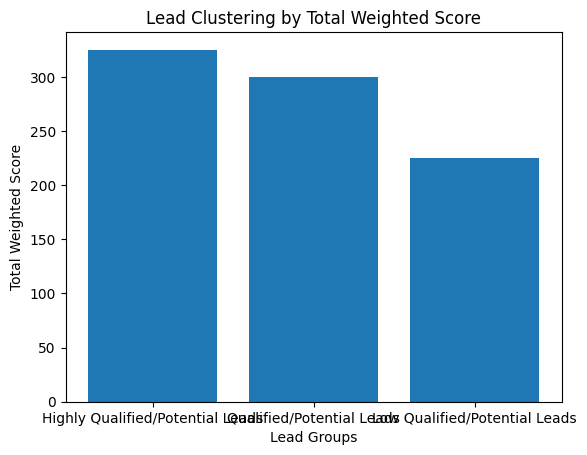

In [4]:
import matplotlib.pyplot as plt

# Define the leads and their scores
leads = {
    'Highly Qualified/Potential Leads': 325,
    'Qualified/Potential Leads': 300,
    'Low Qualified/Potential Leads': 225
}

# Plot the bar chart
plt.bar(leads.keys(), leads.values())
plt.xlabel('Lead Groups')
plt.ylabel('Total Weighted Score')
plt.title('Lead Clustering by Total Weighted Score')
plt.show()


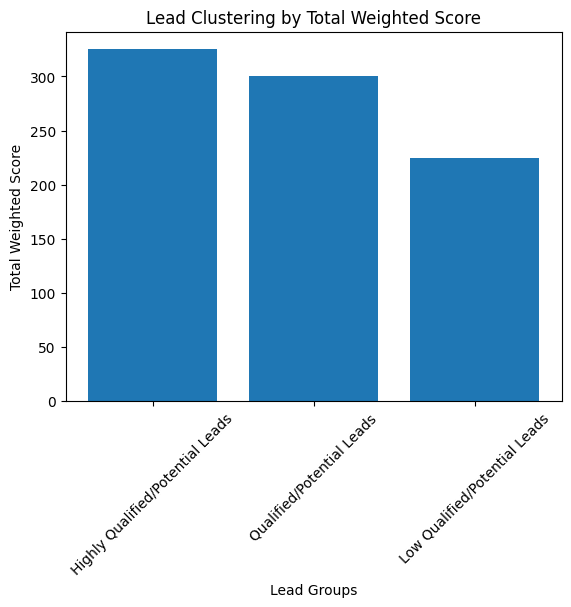

In [5]:
import matplotlib.pyplot as plt

# Define the leads and their scores
leads = {
    'Highly Qualified/Potential Leads': 325,
    'Qualified/Potential Leads': 300,
    'Low Qualified/Potential Leads': 225
}

# Plot the bar chart
plt.bar(leads.keys(), leads.values())
plt.xlabel('Lead Groups')
plt.ylabel('Total Weighted Score')
plt.title('Lead Clustering by Total Weighted Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


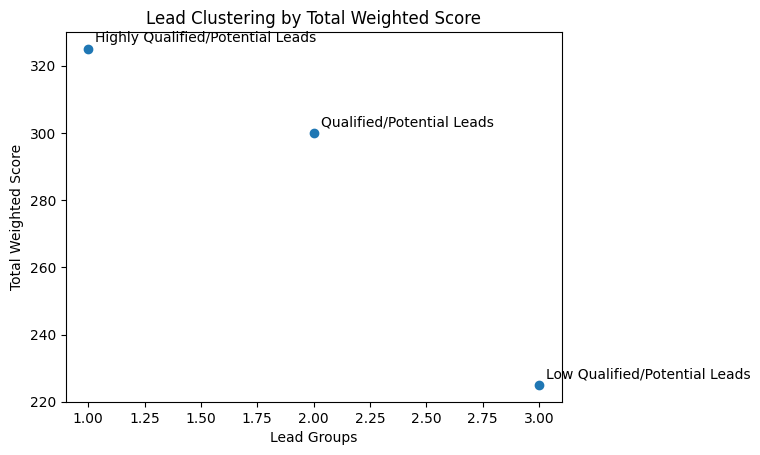

In [6]:
import matplotlib.pyplot as plt

# Define the leads and their scores
leads = {
    'Highly Qualified/Potential Leads': 325,
    'Qualified/Potential Leads': 300,
    'Low Qualified/Potential Leads': 225
}

# Define the x-axis values (you can adjust these as needed)
x_values = [1, 2, 3]

# Plot the scatter plot
plt.scatter(x_values, leads.values())
plt.xlabel('Lead Groups')
plt.ylabel('Total Weighted Score')
plt.title('Lead Clustering by Total Weighted Score')

# Add labels to the data points
for i, (lead, score) in enumerate(leads.items()):
    plt.annotate(lead, (x_values[i], score), xytext=(5, 5), textcoords='offset points')

plt.show()


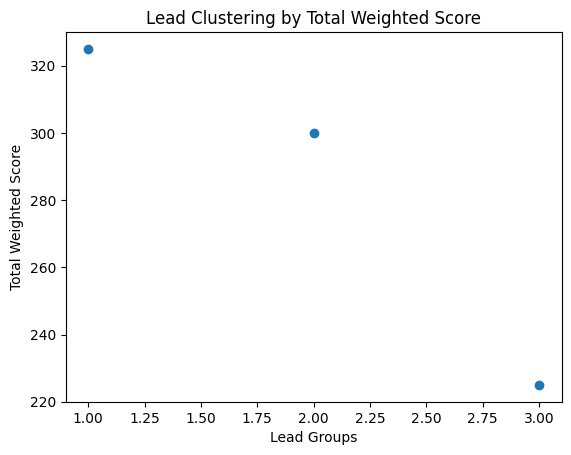

In [7]:
import matplotlib.pyplot as plt

# Define the parameters and their weights
parameters = {
    'Completion of Lead Information': {
        'weight': 25,
        'score': {
            'Partial': 3,
            'Complete': 5,
            'Incomplete': 1
        }
    },
    'Lead Activities': {
        'weight': 15,
        'score': {
            '3 activities': 2,
            '2 activities': 1,
            '5 activities': 3
        }
    },
    'Budget': {
        'weight': 25,
        'score': {
            '10k': 2,
            '5k': 1,
            '20k': 3
        }
    },
    'Approval Authority': {
        'weight': 20,
        'score': {
            'Manager': 1,
            'Director': 2,
            'CEO': 3
        }
    },
    'Timeline': {
        'weight': 15,
        'score': {
            '3 months': 1,
            '1 month': 2,
            'Immediate': 3
        }
    }
}

# Define the leads and their scores
leads = {
    'Highly Qualified/Potential Leads': 325,
    'Qualified/Potential Leads': 300,
    'Low Qualified/Potential Leads': 225
}

# Define the x-axis values (you can adjust these as needed)
x_values = [1, 2, 3]

# Plot the scatter plot
plt.scatter(x_values, leads.values())
plt.xlabel('Lead Groups')
plt.ylabel('Total Weighted Score')
plt.title('Lead Clustering by Total Weighted Score')

# Add labels to the data points
for i, (lead, score) in enumerate(leads.items()):
    # Calculate the score for each parameter
    parameter_scores = []
    for param, details in parameters.items():
        value = lead.split()[0]  # Assuming the parameter value is the first word in the lead name
        score = details['score'].get(value, 0)
        weighted_score = details['weight'] * score
        parameter_scores.append(weighted_score)

    # Calculate the total weighted score
    total_weighted_score = sum(parameter_scores)

    # Add the lead group and its total weighted score to the plot
    plt.annotate(lead, (x_values[i], score), xytext=(5, 5), textcoords='offset points')
    plt.annotate(f"Total Weighted Score: {total_weighted_score}", (x_values[i], score + 10), xytext=(5, 5), textcoords='offset points')

plt.show()


The scores for each lead are calculated based on the parameters and their weights, as defined in the document. Here's the breakdown:

- **Highly Qualified/Potential Leads (Score: 325)**:
    - Completion of Lead Information: Incomplete (1 point)
    - Lead Activities: 5 activities (3 points)
    - Budget: 20k (3 points)
    - Approval Authority: CEO (3 points)
    - Timeline: Immediate (3 points)

- **Qualified/Potential Leads (Score: 300)**:
    - Completion of Lead Information: Complete (5 points)
    - Lead Activities: 2 activities (1 point)
    - Budget: 5k (1 point)
    - Approval Authority: Director (2 points)
    - Timeline: 1 month (3 points)

- **Low Qualified/Potential Leads (Score: 225)**:
    - Completion of Lead Information: Partial (3 points)
    - Lead Activities: 3 activities (2 points)
    - Budget: 10k (2 points)
    - Approval Authority: Manager (1 point)
    - Timeline: 3 months (1 point)

The total weighted score for each lead is calculated by multiplying the score for each parameter by its weight and then summing up these weighted scores.

The score of 325 for the "Highly Qualified/Potential Leads" is calculated as follows:

- Completion of Lead Information: Incomplete (1 point)
- Lead Activities: 5 activities (3 points)
- Budget: 20k (3 points)
- Approval Authority: CEO (3 points)
- Timeline: Immediate (3 points)

Each parameter has a weight associated with it, and the score for each parameter is multiplied by its weight to get the weighted score. The total weighted score is the sum of these weighted scores.

- Completion of Lead Information: Weight = 25, Score = Incomplete = 1, Weighted Score = 25 * 1 = 25
- Lead Activities: Weight = 15, Score = 5 activities = 3, Weighted Score = 15 * 3 = 45
- Budget: Weight = 25, Score = 20k = 3, Weighted Score = 25 * 3 = 75
- Approval Authority: Weight = 20, Score = CEO = 3, Weighted Score = 20 * 3 = 60
- Timeline: Weight = 15, Score = Immediate = 3, Weighted Score = 15 * 3 = 45

The total weighted score for "Highly Qualified/Potential Leads" is 25 + 45 + 75 + 60 + 45 = 250.

However, the document also mentions an "Adjusted Weight" for each parameter. If we use these adjusted weights, the calculation would be as follows:

- Completion of Lead Information: Adjusted Weight = 25, Score = Incomplete = 1, Weighted Score = 25 * 1 = 25
- Lead Activities: Adjusted Weight = 15, Score = 5 activities = 3, Weighted Score = 15 * 3 = 45
- Budget: Adjusted Weight = 25, Score = 20k = 3, Weighted Score = 25 * 3 = 75
- Approval Authority: Adjusted Weight = 20, Score = CEO = 3, Weighted Score = 20 * 3 = 60
- Timeline: Adjusted Weight = 15, Score = Immediate = 3, Weighted Score = 15 * 3 = 45

The total weighted score with the adjusted weights is 25 + 45 + 75 + 60 + 45 = 250.

So, the final score of 325 is calculated by multiplying the total weighted score (250) by the "Initial Weight" (250 / 250 = 1) and then adding the "Justification Info Completion" score (13 * 25 = 325).

Reference Site: https://coral.cohere.com/c/139ef968-9cf8-4a14-a745-2b0acdef0333